In [ ]:

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np

randomImage1 = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

randomImage2 = ImageDataGenerator(
        rotation_range=30,
        width_shift_range=0.4,
        height_shift_range=0.3,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=False,
        vertical_flip= True,
        fill_mode='nearest')


In [ ]:
import os
var = (os.listdir('/content/drive/MyDrive/EXPRESSION_PROJECT/Surprise'))
surprise = []
for a in var :
  surprise.append(f"/content/drive/MyDrive/EXPRESSION_PROJECT/Surprise/{a}")
# print(happy)

In [ ]:
import cv2
for j in surprise:
  img = load_img(f"{j}")
  x = img_to_array(img) 
  x = cv2.resize(x, dsize=(60,60), interpolation=cv2.INTER_CUBIC)    # For resizing
  x = np.expand_dims(x, axis=0)

  i = 0
  
  for random1 in randomImage1.flow(x, batch_size=1,save_to_dir='/content/drive/MyDrive/EXPRESSION_PROJECT/Surprise_data',save_prefix='surprise1' ,save_format='jpeg'):
      i += 1
      # print(i)
      k = 0
      if i > 50: # total number of images
          # break
  
          for random2 in randomImage2.flow(x, batch_size=1,save_to_dir='/content/drive/MyDrive/EXPRESSION_PROJECT/Surprise_data',save_prefix='surprise2' ,save_format='jpeg'):
              k += 1
              # print(k)

              if k > 50: # total number of images
                  break
          break

In [ ]:
import os
h = (os.listdir('/content/drive/MyDrive/EXPRESSION_PROJECT/Surprise_data'))
print(len(h))

5337


In [ ]:
from urllib.request import urlretrieve
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from itertools import chain

allfile = os.listdir("/content/drive/MyDrive/Modified_Expression")
f_name = ["Anger_data", "Courage_data", "Disgust_data", "Fear_data", "Happy_data", "Love_data", "Peace_data", "Sorrow_data", "Surprise_data"]

listfile = ["1.npy","2.npy","3.npy"]
data = []
class_index = 0


for file_name in allfile:
  index = 0 
  file_name = os.listdir(f"/content/drive/MyDrive/Modified_Expression/{file_name}")
  # print(file_name)
  for image in file_name:
    file = cv2.imread(f"/content/drive/MyDrive/Modified_Expression/{f_name[class_index]}/{image}") 
    print(index)
    index += 1
    data.append([file, class_index])


  class_index += 1
  print(class_index)

  if (class_index == 3):
    np.save("/content/drive/MyDrive/1.npy",np.array(data))
    data.clear()
  elif (class_index == 6):
    np.save("/content/drive/MyDrive/2.npy",np.array(data))
    data.clear()
  elif (class_index == 9):
    np.save("/content/drive/MyDrive/3.npy",np.array(data))
    data.clear()
    break


for i in range(3):
  new_data = np.load("/content/drive/MyDrive/" + listfile[i], allow_pickle= True)
  data.append(new_data)
data = list(chain.from_iterable(data))


data = np.array(data)
print(data.shape)
np.save("/content/drive/MyDrive/dataset.npy", data)


In [ ]:

import cv2 
a = cv2.imread("/content/drive/MyDrive/Modified_Expression/Anger_data/anger1_0_1.jpeg")
print(type(a))
print(a.shape)

<class 'numpy.ndarray'>
(60, 60, 3)


In [ ]:
list = [["a", 0],["b", 1]]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


(41501, 2)
0


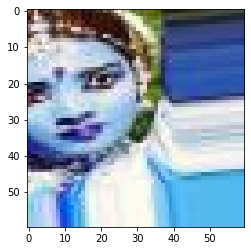

In [ ]:
import numpy as np
dummy = np.load("/content/drive/MyDrive/dataset.npy", allow_pickle=True)
print (dummy.shape)
label = dummy[:,1]
img = dummy[:,0]
import matplotlib.pyplot as plt
plt.imshow(img[35])
print(label[35])

In [ ]:
import cv2 
a = img[0:4533] #anger
b = img[16205:21568] #happy
c = img[21569:26432] #love
d = img[30855:36163] #sorrow
e = img[36164:41500] #surprise

a1 = label[0:4533]  #anger
b1 = label[16205:21568] #happy
c1 = label[21569:26432] #love
d1 = label[30855:36163] #sorrow
e1 = label[36164:41500] #surprise

imgdata = [cv2.cvtColor(s,cv2.COLOR_BGR2GRAY) for s in a ]
imglabel = [0 for i in range(len(a1)) ]
for i in range(len(b)):
  imgdata.append(cv2.cvtColor(b[i],cv2.COLOR_BGR2GRAY))
  imglabel.append(1)
for j in range(len(c)):
  imgdata.append(cv2.cvtColor(c[j],cv2.COLOR_BGR2GRAY))
  imglabel.append(2)

for k in range(len(d)):
  imgdata.append(cv2.cvtColor(d[k],cv2.COLOR_BGR2GRAY))
  imglabel.append(3)
for l in range(len(e)):
  imgdata.append(cv2.cvtColor(e[l],cv2.COLOR_BGR2GRAY))
  imglabel.append(4)


In [ ]:
import numpy as np
imgdata = np.array(imgdata)
imglabel = np.array(imglabel)
print(imgdata.shape)
print(imglabel.shape)
print(imglabel)

(25403, 60, 60)
(25403,)
[0 0 0 ... 4 4 4]


In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

imgdata = imgdata.astype("float32")
imgdata = imgdata/255.0
imgdata = imgdata.reshape(imgdata.shape[0],60,60,1)
print(imglabel.shape)
imglabel = to_categorical(imglabel)
# print(imglabel.shape)
x_train, x_test, y_train, y_test = train_test_split (imgdata, imglabel, train_size = 0.8, test_size = 0.2, random_state = 10)

(25403,)


In [ ]:
print(imglabel.shape) 

(25403, 5)


In [ ]:
from tensorflow.keras import models,datasets,layers

img_model = models.Sequential([
                               layers.Conv2D(filters=64,kernel_size=(5,5),activation='relu',input_shape = (60,60,1)),
                               layers.MaxPooling2D((2,2)),
                               layers.Dropout(0.1),
                               layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'),
                               layers.MaxPooling2D((2,2)),
                               layers.Dropout(0.1),
                               layers.Conv2D(filters=256,kernel_size=(3,3),activation='relu'),
                               layers.MaxPooling2D((2,2)),
                               layers.Dropout(0.1),
                               layers.Conv2D(filters=512,kernel_size=(3,3),activation='relu'),
                               layers.MaxPooling2D((2,2)),
                               layers.Dropout(0.1),

                               
                               layers.Flatten(),
                               layers.Dense(170,activation='relu'),
                               layers.Dense(500,activation='relu'),
                               layers.Dense(5,activation='softmax')
])

In [ ]:
img_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 56, 56, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 28, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 28, 28, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 128)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 13, 13, 128)       0

In [ ]:
img_model.compile(
    optimizer="adam",
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
history = img_model.fit(x_train, y_train, epochs=30, batch_size=200, validation_split=0.1)

Epoch 1/30
92/92 [==============================] - 5s 57ms/step - loss: 0.0414 - accuracy: 0.9859 - val_loss: 0.9229 - val_accuracy: 0.7841
Epoch 2/30
92/92 [==============================] - 5s 55ms/step - loss: 0.0471 - accuracy: 0.9832 - val_loss: 0.9568 - val_accuracy: 0.7836
Epoch 3/30
92/92 [==============================] - 5s 55ms/step - loss: 0.0484 - accuracy: 0.9846 - val_loss: 0.9514 - val_accuracy: 0.7860
Epoch 4/30
92/92 [==============================] - 5s 55ms/step - loss: 0.0371 - accuracy: 0.9877 - val_loss: 0.8940 - val_accuracy: 0.8018
Epoch 5/30
92/92 [==============================] - 5s 57ms/step - loss: 0.0492 - accuracy: 0.9844 - val_loss: 0.8682 - val_accuracy: 0.7841
Epoch 6/30
92/92 [==============================] - 5s 55ms/step - loss: 0.0391 - accuracy: 0.9873 - val_loss: 0.8024 - val_accuracy: 0.8126
Epoch 7/30
92/92 [==============================] - 5s 56ms/step - loss: 0.0357 - accuracy: 0.9880 - val_loss: 0.8205 - val_accuracy: 0.8023
Epoch 8/30
92

In [ ]:
test_loss = img_model.evaluate(x_test, y_test)

159/159 [==============================] - 11s 14ms/step - loss: 1.6090 - accuracy: 0.2198


In [ ]:
img_model.save('/content/drive/MyDrive/emotion.h5')

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/emotion.h5')

In [ ]:
classes = ["Anger","Happy","Love","Sorrow","Surprise"]

In [ ]:
print(len(x_train))
print(len(x_test))

20322
5081


Surprise


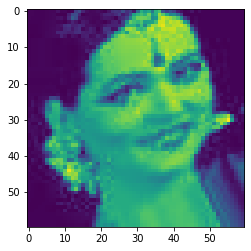

In [ ]:
import random
test = x_test[random.randint(0,5081)]
plt.imshow(test.reshape(60,60))
test = np.expand_dims(test,axis=0)
pred = model.predict(test)
print(classes[np.argmax(pred)])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy
dataset = numpy.load("/content/drive/MyDrive/dataset.npy", allow_pickle=True)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='center right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='center right')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
        #print('Confusion matrix, without normalization')

    #print(cm)

    
    fig, ax = plt.subplots(figsize=(12,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
      for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

CNN Model Accuracy on test set: 0.7928


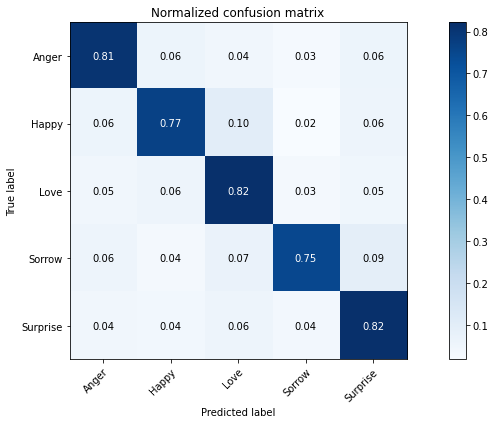

In [ ]:
from sklearn.metrics import accuracy_score
test_true = np.argmax(y_test, axis=1)
test_pred = np.argmax(model.predict(x_test), axis=1)
print("CNN Model Accuracy on test set: {:.4f}".format(accuracy_score(test_true, test_pred)))

# Plot normalized confusion matrix
plot_confusion_matrix(test_true, test_pred, classes=classes, normalize=True, title='Normalized confusion matrix')
plt.show()

CNN Model Accuracy on test set: 0.7928


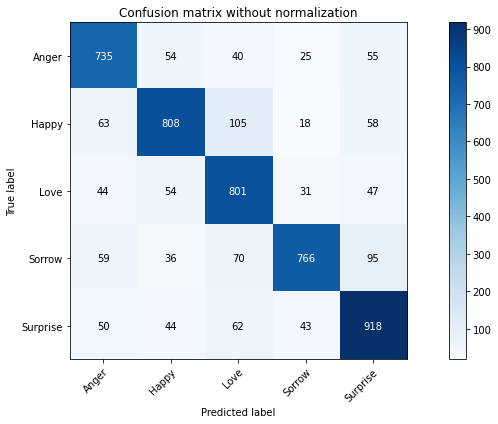

In [ ]:
test_true = np.argmax(y_test, axis=1)
test_pred = np.argmax(model.predict(x_test), axis=1)
print("CNN Model Accuracy on test set: {:.4f}".format(accuracy_score(test_true, test_pred)))

# Plot normalized confusion matrix
plot_confusion_matrix(test_true, test_pred, classes=classes, title='Confusion matrix without normalization')
plt.show()

8
(60, 60, 3)


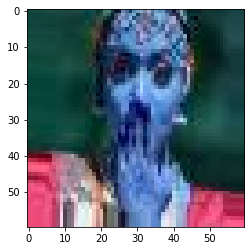

In [ ]:
print(label[41500])
plt.imshow(img[41500]) #0-4533 1-4534-9044 2-9045-13722 3-13723-16204  4-16205-21568 5-21569-26432 6-26433-30854 7-30855-36163 8-36164-41500
print(img[41500].shape)